# OMOP Data Connection

      age         gender_concept_id    gender   
 Min.   :  7.00   Min.   :8507      Male  :570  
 1st Qu.: 30.00   1st Qu.:8507      Female:558  
 Median : 49.00   Median :8507                  
 Mean   : 50.86   Mean   :8519                  
 3rd Qu.: 68.00   3rd Qu.:8532                  
 Max.   :117.00   Max.   :8532                  

   person_id      value_as_number observation_concept_id
 Min.   :  11.0   Min.   :3.700   Min.   :3004410       
 1st Qu.: 263.0   1st Qu.:5.100   1st Qu.:3004410       
 Median : 604.0   Median :6.700   Median :3004410       
 Mean   : 563.1   Mean   :6.432   Mean   :3004410       
 3rd Qu.: 859.0   3rd Qu.:7.700   3rd Qu.:3004410       
 Max.   :1111.0   Max.   :8.900   Max.   :3004410       

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


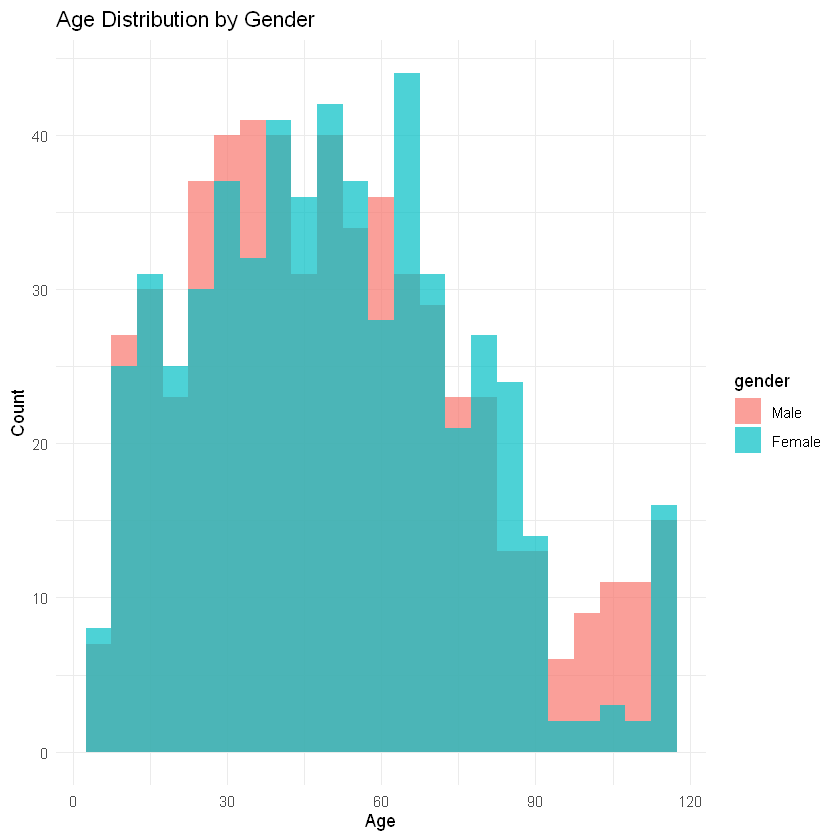

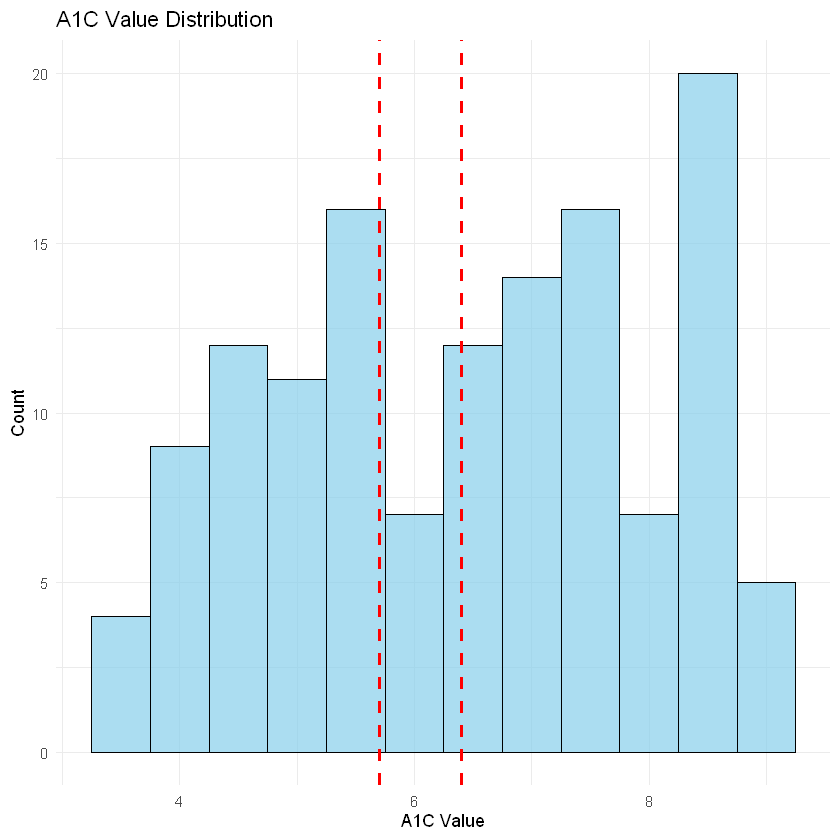

In [ ]:
library(DBI)
library(odbc)
library(dplyr)
library(ggplot2)

# Establish connection (Modify with your credentials)
con <- dbConnect(odbc::odbc(),
                 Driver = "SQL Server",   # Change to your database driver
                 Server = "bime537.database.windows.net",  # Change to your server
                 Database = "OMOP_CDM",  # Change to your database name
                 UID = "",   # Change to your username
                 PWD = "",   # Change to your password
                 Port = 1433)              # Change port if needed

# Query person table (Retrieve age and gender)
person_data <- dbGetQuery(con, "
    SELECT YEAR(GETDATE()) - year_of_birth AS age, gender_concept_id
    FROM person
")

# Query observation table (Retrieve blood pressure values)
a1c_data <- dbGetQuery(con, "
    SELECT person_id, value_as_number, observation_concept_id
    FROM observation
    WHERE observation_concept_id = 3004410  -- A1c vale
")

# Close the database connection
dbDisconnect(con)

# Convert gender codes to labels
gender_labels <- c("8507" = "Male", "8532" = "Female")
person_data$gender <- factor(person_data$gender_concept_id, levels = names(gender_labels), labels = gender_labels)

# Summary statistics
summary(person_data)
summary(a1c_data)

# Visualization: Age distribution
ggplot(person_data, aes(x = age, fill = gender)) +
    geom_histogram(binwidth = 5, alpha = 0.7, position = "identity") +
    labs(title = "Age Distribution by Gender", x = "Age", y = "Count") +
    theme_minimal()

# Visualization: Histogram of A1C values with cutoff lines
ggplot(a1c_data, aes(x = value_as_number)) +
    geom_histogram(binwidth = 0.5, fill = "skyblue", color = "black", alpha = 0.7) +
    geom_vline(xintercept = 5.7, linetype = "dashed", color = "red", size = 1) +  # Lower bound of normal A1C
    geom_vline(xintercept = 6.4, linetype = "dashed", color = "red", size = 1) +  # Upper bound of normal A1C
    labs(title = "A1C Value Distribution", x = "A1C Value", y = "Count") +
    theme_minimal()